In [197]:
import sympy as smp
import numpy as np
import scipy

from scipy.optimize import  curve_fit

import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [202]:
data = planilha_cartolina = pd.read_excel('./dados.xlsx')

x_data = data['L(0,1cm)'][3:13]*1e-2 #0-15
y_data = data['T(0,01s)'][3:13]
#x_data = np.sqrt(x_data**2 - 0.22**2)

x_err = 0.1*1e-2
y_err = 0.05

x_data_lin = x_data
y_data_lin = y_data**2

x_err_lin = x_err
y_err_lin = 2*y_data*y_err

len(x_data)

10

In [199]:
result = scipy.stats.linregress(x_data_lin, y_data_lin)

#y = ax + b
a = result.slope
a_err = result.stderr

b = result.intercept
b_err = result.intercept_stderr

r2 = result.rvalue**2

def func(x):
    return a*x + b

print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a =  4.025172439859679
b =  0.0565057183553197
r^2 = 0.9995655389468011
a_err =  0.029669435596866377
b_err =  0.05138368682799784


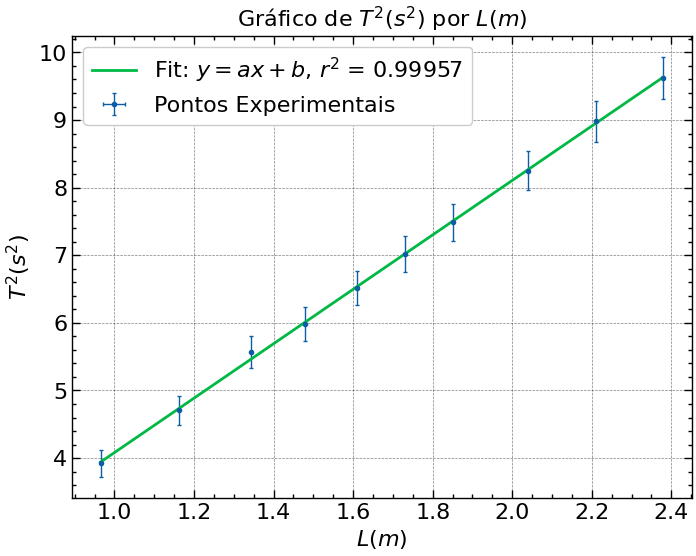

In [200]:
plt.errorbar(x_data_lin, y_data_lin, xerr = x_err_lin, yerr = y_err_lin, marker = 'o', ls = '', ms = 3,capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title(r'Gráfico de $T^2(s^2)$ por $L(m)$')

plt.xlabel(r'$L(m)$')
plt.ylabel(r'$T^2(s^2)$')

func = lambda x: a*x + b
plt.plot(x_data_lin, func(x_data_lin) , label= r'Fit: $y = ax + b$, $r^2$ = %.5f' % (r2))
plt.legend()


In [201]:
g = 4*np.pi**2/a
print(g)

delta_g = 4*np.pi**2/(a**2) * a_err
delta_g

9.807882319132068


0.0722936314299314